In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go  # Import Plotly graph objects
import plotly.express as px  # Import Plotly Express

## SET & RESET

In [ ]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth',None)

In [3]:
# Mounting google drive account in colab

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Capstone_Project_REAL_ESTATE/gurgaon_real_estate_cleaned_ver2.csv')

In [5]:
df.duplicated().sum()

4

In [6]:
df.drop_duplicates(inplace=True)

In [ ]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_builtup_area,builtup_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,dlf regal gardens,sector 90,1.26,"7,403.00","1,702.00",super built up area 1702(158.12 sq.m.)carpet area: 1500(139.35 sq.m.),3,3,3,6.00,North-East,Relatively New,"1,702.00",NaN,"1,500.00",0,0,0,0,1,1,28
1,flat,tulip violet,sector 69,1.72,"8,730.00","1,970.00",super built up area 1970(183.02 sq.m.),4,4,1,12.00,North-East,Relatively New,"1,970.00",NaN,NaN,0,0,0,0,0,0,86
2,flat,experion the heartsong,sector 108,2.28,"8,204.00","2,779.00",super built up area 2779(258.18 sq.m.),4,5,3+,8.00,North,Relatively New,"2,779.00",NaN,NaN,0,0,0,0,0,0,101
3,flat,signature global city 92,sector 92,0.78,"8,047.00",969.00,super built up area 1197(111.2 sq.m.),2,2,2,2.00,not available,New Property,"1,197.00",NaN,NaN,0,0,0,0,0,1,47
4,flat,puri diplomatic greens,sector 111,3.45,"11,694.00","2,950.00",super built up area 2950(274.06 sq.m.),4,5,3+,10.00,North,Relatively New,"2,949.00",NaN,NaN,0,1,0,0,0,0,101


## property_type vs price

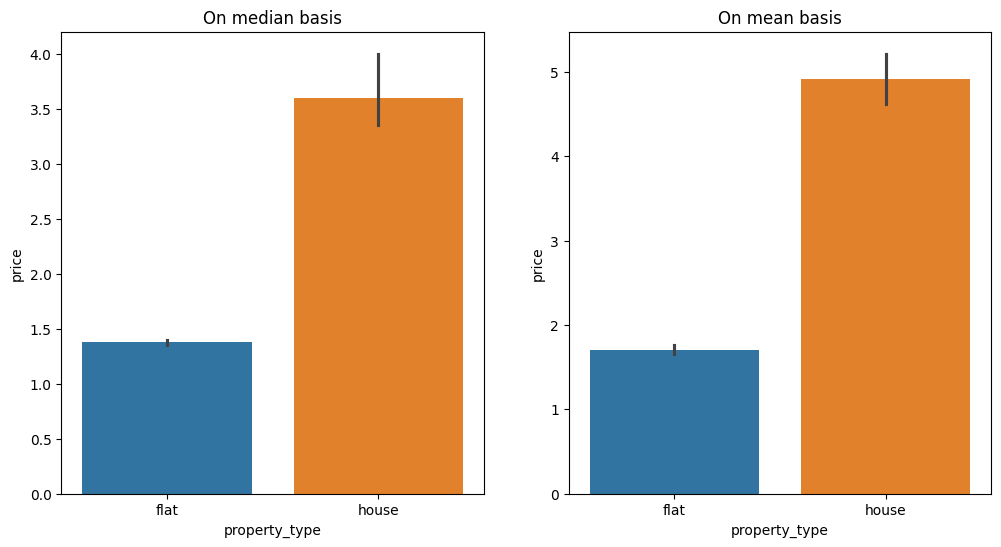

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.barplot(x=df['property_type'],y=df['price'],hue=df['property_type'],estimator=np.median, ax=axes[0])
axes[0].set_title('On median basis')

# Plot the second barplot on the second subplot
sns.barplot(x=df['property_type'],y=df['price'],hue=df['property_type'],estimator=np.mean, ax=axes[1])
axes[1].set_title('On mean basis')

plt.show()

- On median basis & mean basis , houses are dearer than flat

In [ ]:
fig = px.box(x=df['property_type'],y=df['price'])
fig.show()

- flat has narrow IQR range than house indicating wider range of price available for houses than flats in middle 50% of data

## property_type vs area

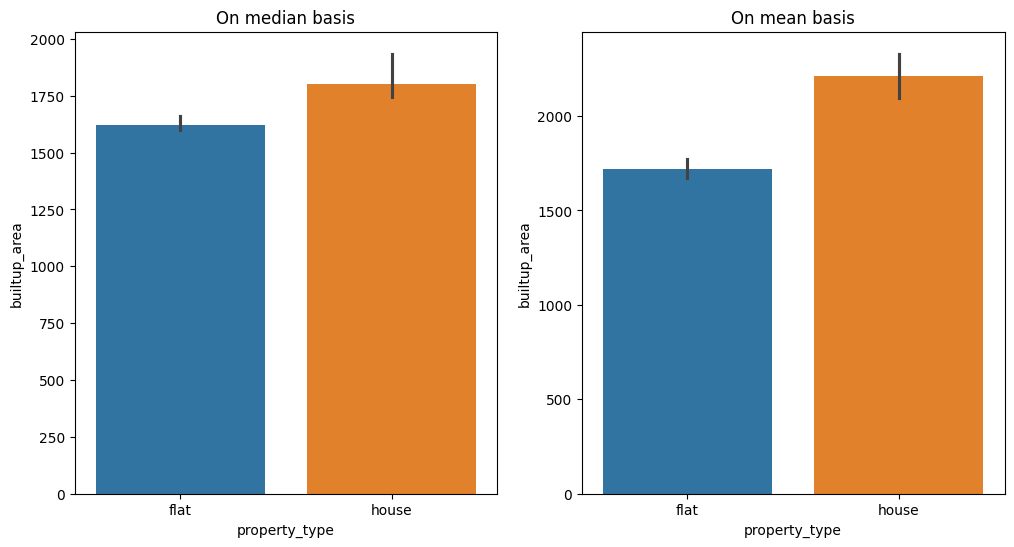

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.barplot(x=df['property_type'],y=df['builtup_area'],hue=df['property_type'],estimator=np.median, ax=axes[0])
axes[0].set_title('On median basis')

# Plot the second barplot on the second subplot
sns.barplot(x=df['property_type'],y=df['builtup_area'],hue=df['property_type'],estimator=np.mean, ax=axes[1])
axes[1].set_title('On mean basis')

plt.show()

In [ ]:
fig = px.box(x=df['property_type'],y=df['builtup_area'])
fig.show()

- flat has narrow IQR range than house indicating wider range of 'sqft' options available for houses than flats in middle 50% of data
- On median and average basis, house prices are dearer than flat

In [8]:
sorted_data = df.loc[df['builtup_area'].notnull(), :].sort_values(by='builtup_area', ascending=False).head(20)

In [9]:
pd.options.display.float_format = '{:,.2f}'.format

In [10]:
df = df[df['builtup_area'] != df['builtup_area'].max()] #removing highly extreme outliers

In [11]:
df = df[df['builtup_area'] != df['builtup_area'].max()]  #removing highly extreme outliers

In [12]:
sorted_data.loc[2914,'area'] = 115*9  #rectifying data errors

In [13]:
sorted_data.loc[2914,'price_per_sqft'] = 12500000/1035

In [14]:
sorted_data.loc[2914,'builtup_area'] = sorted_data.loc[2914,'area'] #rectifying data errors

In [15]:
sorted_data.head(10)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_builtup_area,builtup_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1942,house,independent,sector 11,1.45,2.00,"7,250,000.00",plot area 200(809372 sq.m.),4,3,3+,...,NaN,"8,708,843.00",NaN,0,0,0,0,0,0,0
1843,flat,hcbs sports ville,sohna road,0.35,4.00,"875,000.00",built up area: 737147 (68483.2 sq.m.),2,2,2,...,NaN,"736,880.00",NaN,0,0,0,0,0,2,44
2914,house,ganpati heights apartment,sector 13,1.25,"12,077.29","1,035.00",plot area 115(7692.86 sq.m.),10,6,2,...,NaN,"1,035.00",NaN,0,0,0,0,1,0,7
352,house,independent,sector 51,5.50,"1,087.00","50,598.00",plot area 5620(4699.04 sq.m.)built up area: 82...,8,8,2,...,NaN,"50,562.00","43,725.00",0,0,0,1,0,1,49
1150,house,independent,sector 57,6.25,"2,778.00","22,498.00",plot area 3100(2591.99 sq.m.)built up area: 26...,9,9,3+,...,NaN,"27,890.00","22,492.00",0,1,0,0,0,1,61
1286,house,independent,sector 3 phase i,1.45,557.00,"26,032.00",plot area 26000(2415.48 sq.m.),4,4,2,...,NaN,"25,991.00",NaN,0,1,0,1,0,0,62
3590,house,independent,sector 4 phase 2,0.85,630.00,"13,492.00",plot area 1500(1254.19 sq.m.),3,3,1,...,NaN,"13,496.00",NaN,0,0,0,0,1,0,0
3391,house,independent,sector 43,27.50,"24,366.00","11,286.00",plot area 1254(1048.5 sq.m.),6,7,3+,...,NaN,"11,282.00",NaN,1,1,0,1,1,1,42
473,house,independent,sector 50,5.00,232.00,"215,517.00",plot area 2(1011.71 sq.m.),6,5,3+,...,NaN,"10,886.00",NaN,1,1,0,1,1,1,0
3589,house,independent,sohna road road,5.50,"5,093.00","10,799.00",plot area 1200(1003.35 sq.m.)built up area: 35...,3,3,3+,...,NaN,"10,797.00",NaN,1,1,0,1,1,0,49


In [16]:
df.update(sorted_data)

In [17]:
df.shape

(3811, 23)

In [18]:
sorted_data.loc[473,'area'] = 1011.71*10.76 #rectifying data errors

In [19]:
sorted_data.loc[473,'price_per_sqft'] = 50000000/(sorted_data.loc[473,'area'])

In [20]:
df.loc[df['builtup_area'].notnull(), :].sort_values(by='builtup_area', ascending=False).head(20)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_builtup_area,builtup_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
352,house,independent,sector 51,5.50,"1,087.00","50,598.00",plot area 5620(4699.04 sq.m.)built up area: 82...,8,8,2,...,NaN,"50,562.00","43,725.00",0,0,0,1,0,1,49
1150,house,independent,sector 57,6.25,"2,778.00","22,498.00",plot area 3100(2591.99 sq.m.)built up area: 26...,9,9,3+,...,NaN,"27,890.00","22,492.00",0,1,0,0,0,1,61
1286,house,independent,sector 3 phase i,1.45,557.00,"26,032.00",plot area 26000(2415.48 sq.m.),4,4,2,...,NaN,"25,991.00",NaN,0,1,0,1,0,0,62
3590,house,independent,sector 4 phase 2,0.85,630.00,"13,492.00",plot area 1500(1254.19 sq.m.),3,3,1,...,NaN,"13,496.00",NaN,0,0,0,0,1,0,0
3391,house,independent,sector 43,27.50,"24,366.00","11,286.00",plot area 1254(1048.5 sq.m.),6,7,3+,...,NaN,"11,282.00",NaN,1,1,0,1,1,1,42
473,house,independent,sector 50,5.00,232.00,"215,517.00",plot area 2(1011.71 sq.m.),6,5,3+,...,NaN,"10,886.00",NaN,1,1,0,1,1,1,0
3589,house,independent,sohna road road,5.50,"5,093.00","10,799.00",plot area 1200(1003.35 sq.m.)built up area: 35...,3,3,3+,...,NaN,"10,797.00",NaN,1,1,0,1,1,0,49
447,house,suncity township,sector 54,25.00,"31,111.00","8,036.00",plot area 1000(836.13 sq.m.),4,4,3+,...,NaN,"8,997.00",NaN,1,1,1,1,0,0,0
183,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.50,"35,000.00","9,000.00",plot area 1000(836.13 sq.m.),7,9,3+,...,NaN,"8,997.00",NaN,1,1,1,1,0,2,74
2265,house,independent,sector 26,23.00,"25,556.00","9,000.00",plot area 1000(836.13 sq.m.),4,4,3+,...,NaN,"8,997.00",NaN,1,1,1,1,0,1,145


In [21]:
df_edit = df.loc[df['builtup_area'].notnull(), :].sort_values(by='builtup_area', ascending=False).head(3).index  # removing extreme outliers

In [22]:
df.loc[df['builtup_area'].notnull(), :].sort_values(by='builtup_area', ascending=False).head(3).index

Index([352, 1150, 1286], dtype='int64')

In [23]:
list(df_edit)

[352, 1150, 1286]

In [24]:
df.drop(index=list(df_edit),inplace=True)

In [25]:
df.shape

(3808, 23)

In [26]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_builtup_area,builtup_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,dlf regal gardens,sector 90,1.26,"7,403.00","1,702.00",super built up area 1702(158.12 sq.m.)carpet a...,3,3,3,...,"1,702.00",NaN,"1,500.00",0,0,0,0,1,1,28
1,flat,tulip violet,sector 69,1.72,"8,730.00","1,970.00",super built up area 1970(183.02 sq.m.),4,4,1,...,"1,970.00",NaN,NaN,0,0,0,0,0,0,86
2,flat,experion the heartsong,sector 108,2.28,"8,204.00","2,779.00",super built up area 2779(258.18 sq.m.),4,5,3+,...,"2,779.00",NaN,NaN,0,0,0,0,0,0,101
3,flat,signature global city 92,sector 92,0.78,"8,047.00",969.00,super built up area 1197(111.2 sq.m.),2,2,2,...,"1,197.00",NaN,NaN,0,0,0,0,0,1,47
4,flat,puri diplomatic greens,sector 111,3.45,"11,694.00","2,950.00",super built up area 2950(274.06 sq.m.),4,5,3+,...,"2,949.00",NaN,NaN,0,1,0,0,0,0,101


## property_type vs price_per_sqft

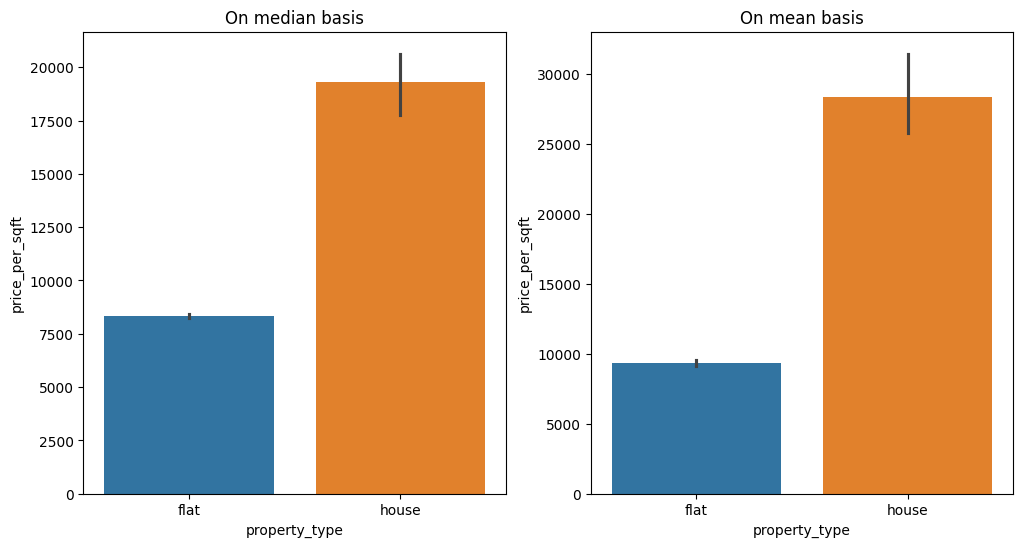

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.barplot(x=df['property_type'],y=df['price_per_sqft'],hue=df['property_type'],estimator=np.median, ax=axes[0])
axes[0].set_title('On median basis')

# Plot the second barplot on the second subplot
sns.barplot(x=df['property_type'],y=df['price_per_sqft'],hue=df['property_type'],estimator=np.mean, ax=axes[1])
axes[1].set_title('On mean basis')

plt.show()

In [ ]:
fig = px.box(x=df['property_type'],y=df['price_per_sqft'])
fig.show()

In [ ]:
df.loc[df['price_per_sqft'].notnull(), :].sort_values(by='price_per_sqft', ascending=False).head(20)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_builtup_area,builtup_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1954,house,emaar the palm springs,sector 54,24.00,"600,000.00",400.00,plot area 400(37.16 sq.m.),5,5,2,1.00,North-East,Old Property,NaN,400.00,NaN,1,1,0,1,0,1,122
3479,house,dlf city plots phase 2,sector 25,10.00,"400,000.00",250.00,plot area 250(23.23 sq.m.),12,12,3+,4.00,North,Relatively New,NaN,250.00,NaN,1,1,0,0,0,1,114
3385,house,independent,sector 12,6.00,"315,789.00",190.00,plot area 190(17.65 sq.m.)carpet area: 1600(148.64 sq.m.),9,6,2,2.00,North-East,Old Property,NaN,190.00,"1,600.00",0,0,0,0,0,0,0
896,house,ansal,c block sector 43,1.85,"308,333.00",60.00,plot area 60(5.57 sq.m.),8,8,3+,5.00,North-West,Relatively New,NaN,60.00,NaN,0,0,0,0,0,0,53
1958,house,uppal southend,sector 49,6.75,"290,948.00",232.00,plot area 232(21.55 sq.m.),12,12,3+,NaN,West,Moderately Old,NaN,232.00,NaN,1,1,0,1,1,1,49
578,house,unitech nirvana birch court,sector 50,7.10,"283,333.00",251.00,plot area 240(22.3 sq.m.),3,3,3,1.00,East,Moderately Old,NaN,240.00,NaN,0,1,0,0,0,0,49
1239,house,independent,sector 57,8.00,"266,666.00",300.00,plot area 300(27.87 sq.m.),5,4,3,2.00,North,Relatively New,NaN,300.00,NaN,1,1,0,1,0,0,21
1459,house,dlf city plots phase 2,sector 25,10.50,"261,194.00",402.00,plot area 402(37.35 sq.m.),4,4,2,2.00,East,Old Property,NaN,402.00,NaN,0,1,0,1,0,1,91
81,house,huda plot sector 38,sector 38,4.30,"245,398.00",175.00,plot area 163(15.14 sq.m.)built up area: 145(13.47 sq.m.),13,13,3+,5.00,North-West,Relatively New,NaN,163.00,NaN,0,0,0,0,0,2,7
1048,house,independent,sector 55,1.45,"241,666.00",60.00,plot area 60(5.57 sq.m.),4,4,3+,4.00,East,Relatively New,NaN,60.00,NaN,0,0,1,0,0,0,70


- Extreme outliers on higher end of price_per_ft data -> need to investigate

In [ ]:
fig = px.imshow(pd.crosstab(df['property_type'],df['bedRoom']),color_continuous_scale='RdBu',text_auto=True)

In [ ]:
fig.show()

In [ ]:
fig = px.box(x=df['property_type'],y=df['bedRoom'])
fig.show()

- Majority of the flats have 2 to 4 bedrooms with very few outliers
- Flats have narrow IQR range indicating less option of bedroom count
- Bedroom in house have few extreme potential outliers
- Majority of the flats have 2 to 6 bedrooms

In [ ]:
fig = px.imshow(pd.crosstab(df['property_type'],df['floorNum']),color_continuous_scale='RdBu',text_auto=True)
fig.show()


In [ ]:
fig = px.box(x=df['property_type'],y=df['floorNum'])
fig.show()

- Majority of the flats are on 1st to 12th floor with very few outliers
- Flats have bigger IQR range indicating more options of floors
- Majority of the houses have 1 to 4 floors with many extreme outliers
- Some of the extreme outliers are houses on top floor of the apartments(hence those are not under independent house category)

In [ ]:
df.loc[df['floorNum'].notnull(), :].sort_values(by='floorNum', ascending=False).head(20)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_builtup_area,builtup_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2194,house,ireo victory valley,sector 67,8.00,"22,222.00","3,600.00",plot area 400(334.45 sq.m.),6,7,3+,51.00,North-East,Moderately Old,NaN,"3,599.00",NaN,1,1,0,1,0,1,49
3001,flat,m3m heights,sector 65,2.86,"14,000.00","2,043.00",carpet area: 2040 (189.52 sq.m.),3,3,3,45.00,East,Under Construction,NaN,NaN,"2,040.00",0,1,0,0,0,0,48
795,flat,m3m heights,sector 65,2.78,"15,200.00","1,829.00",super built up area 1828(169.83 sq.m.),3,3,3,44.00,not available,Undefined,"1,828.00",NaN,NaN,0,0,0,0,0,0,56
627,flat,m3m skycity,sector 65,2.10,"16,030.00","1,310.00",super built up area 1310(121.7 sq.m.),2,2,2,43.00,not available,New Property,"1,310.00",NaN,NaN,0,0,0,0,0,0,127
167,flat,m3m skycity,sector 65,2.85,"15,590.00","1,828.00",super built up area 1828(169.83 sq.m.),3,3,3,43.00,South,Under Construction,"1,828.00",NaN,NaN,0,0,0,0,0,1,115
138,house,independent,sector 28,1.60,"160,000.00",100.00,plot area 100(9.29 sq.m.),3,2,2,41.00,not available,Relatively New,NaN,100.00,NaN,0,0,0,0,0,0,0
2317,flat,m3m heights,sector 65,1.90,"13,991.00","1,358.00",built up area: 1358 (126.16 sq.m.),2,2,2,40.00,not available,Undefined,NaN,"1,358.00",NaN,0,0,0,0,0,0,48
984,flat,tata primanti,sector 72,3.90,"13,425.00","2,905.00",super built up area 2905(269.88 sq.m.)carpet area: 2150(199.74 sq.m.),4,4,3+,39.00,East,Relatively New,"2,904.00",NaN,"2,150.00",0,1,0,0,1,0,49
2733,flat,tata primanti,sector 72,4.10,"14,100.00","2,908.00",super built up area 2905(269.88 sq.m.),4,5,3+,39.00,not available,New Property,"2,904.00",NaN,NaN,0,1,0,0,1,0,103
2333,flat,m3m golfestate,sector 65,5.30,"24,211.00","2,189.00",super built up area 2850(264.77 sq.m.)carpet area: 2189(203.36 sq.m.),3,3,3,38.00,North-East,Moderately Old,"2,849.00",NaN,"2,189.00",0,1,0,0,0,2,49


In [ ]:
fig = px.imshow(pd.crosstab(df['property_type'],df['agePossession']),color_continuous_scale='RdBu',text_auto=True)
fig.show()


- Majority of the flats are 'relatively new' & 'new property'
- Very few properties in house cat are 'under construction' or 'moderately old'

<Axes: xlabel='bedRoom', ylabel='property_type'>

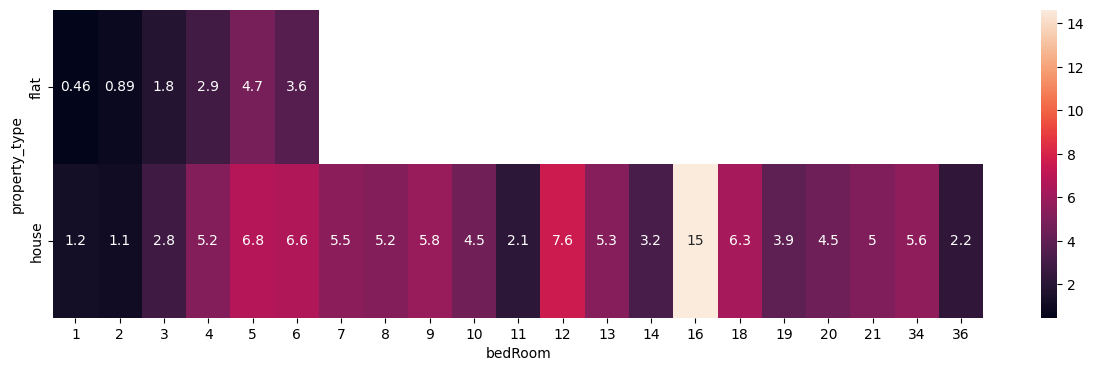

In [ ]:
plt.figure(figsize=(15,4))
sns.heatmap(pd.pivot_table(df,index='property_type',columns='bedRoom',values='price',aggfunc='mean'),annot=True)


- decent amount of the properties which are having more bedrooms are priced less than the ones having less bedrooms thus we need to investigate those properties

In [ ]:
fig = px.imshow(pd.crosstab(df['property_type'],df['furnishing_type']),color_continuous_scale='RdBu',text_auto=True)
fig.show()

# 0 -> Unfurnished
# 1 -> Semi furnished
# 2 -> Furnished


In [ ]:
fig = px.imshow(pd.pivot_table(df,index='property_type',columns='furnishing_type',values='price',aggfunc='mean'),color_continuous_scale='RdBu',text_auto=True)
fig.show()


- More than 50% of the proporties in both flat & house are Unfurnished
- Properties are priced as per the furnishing type as expected

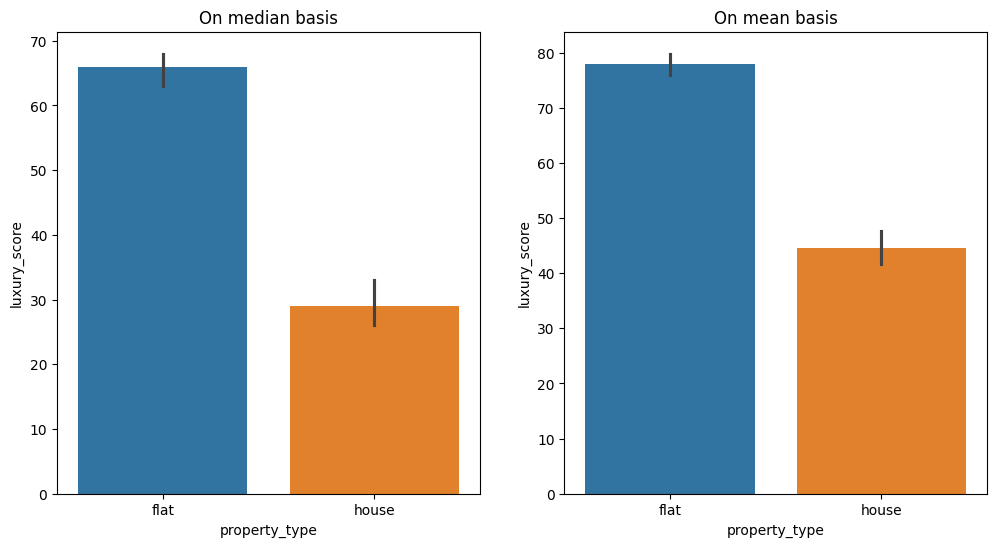

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.barplot(x=df['property_type'],y=df['luxury_score'],hue=df['property_type'],estimator=np.median, ax=axes[0])
axes[0].set_title('On median basis')

# Plot the second barplot on the second subplot
sns.barplot(x=df['property_type'],y=df['luxury_score'],hue=df['property_type'],estimator=np.mean, ax=axes[1])
axes[1].set_title('On mean basis')

plt.show()

In [ ]:
fig = px.box(x=df['property_type'],y=df['luxury_score'])
fig.show()

- On median and average basis, flats have higher luxury scores than the house
- both property types have significant IQR range

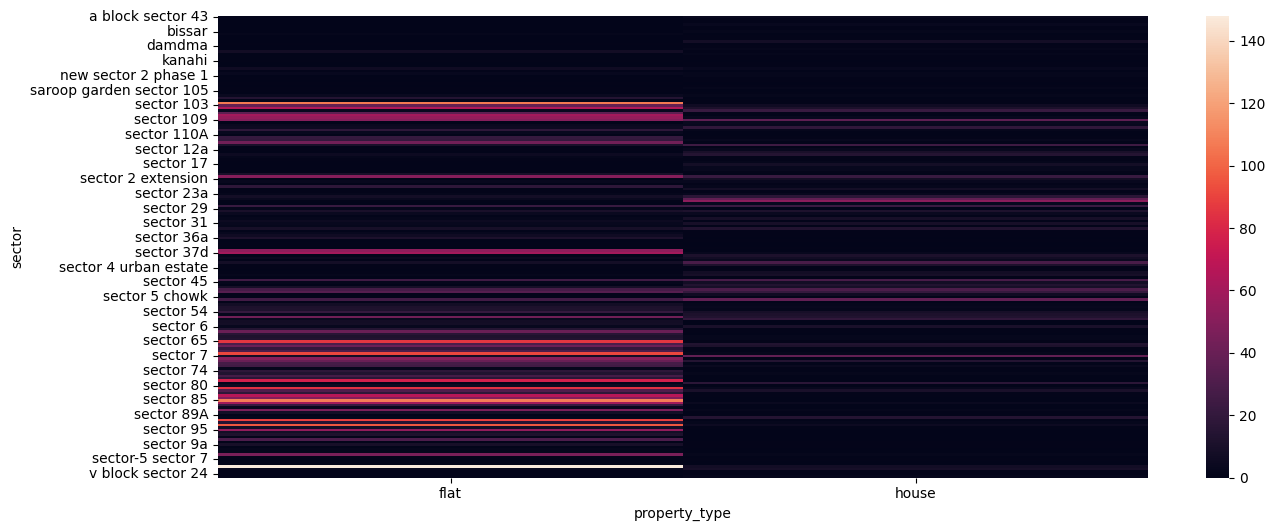

In [ ]:
plt.figure(figsize=(15,6))
sns.heatmap(pd.crosstab(df['sector'].sort_index(),df['property_type']))
plt.show()

In [27]:
df['sector'].unique()

array(['sector 90', 'sector 69', 'sector 108', 'sector 92', 'sector 111',
       'sector 17', 'sector 61', 'sector 24', 'kanahi', 'sector 70a',
       'sector 71', 'sector 48', 'sector 88a', 'sector 67', 'sector 22',
       'sector 37c', 'sector 104', 'sector 10A', 'sector 65', 'sector 4',
       'sector 82', 'sector 37d', 'sector 81', 'sector 50', 'sector 10a',
       'sector 43', 'sector 107', 'sector 89', 'sector 54', 'sector 66',
       'sector 99a', 'sector 85', 'sector 36a', 'sector 79', 'sector 51',
       'sector 102', 'sohna road', 'sector 7', 'sector 78', 'sector 28',
       'sector 95a', 'sector 59', 'sector 67a', 'sector 72', 'sector 103',
       'sector 23', 'sector 70', 'sector 82a', 'sector 106', 'sector 49',
       'sector 2', 'sector 56', 'sector 38', 'sector 52', 'sector 109',
       'sector 3', 'sector 46', 'sector 26', 'sector 14',
       'sector 15 part 2', 'sector 68', 'sector 36', 'dwarka expressway',
       'sector 86', 'sector 27', 'sector 62', 'sector 110 a',


In [28]:
df['sector'] = df['sector'].str.replace('sector-5 sohna road','sector 5')

In [29]:
df['sector'] = df['sector'].str.replace('sector-33 sohna road','sector 33')
df['sector'] = df['sector'].str.replace('sohna road road','sohna road')
df['sector'] = df['sector'].str.replace('sector-2 sohna road','sector 2')
df['sector'] = df['sector'].str.replace('old delhi road, opp sector-14','sector 14')
df['sector'] = df['sector'].str.replace('sector-35 sohna road','sector 35')
df['sector'] = df['sector'].str.replace('anand garden, sector-105','sector 105')
df['sector'] = df['sector'].str.replace('sector-11 sohna road','sector 11')
df['sector'] = df['sector'].str.replace('sector-7 hous','sector 7')
df['sector'] = df['sector'].str.replace('block g sector-57','sector 57')


In [30]:
df_sector = df['sector'].str.extract(r'(sector \d+)|(sector \d+[a-zA-Z])')

In [31]:
df_notnull = df_sector[df_sector.notnull().any(axis=1)]

In [32]:
df_notnull

,0,1
0,sector 90,NaN
1,sector 69,NaN
2,sector 108,NaN
3,sector 92,NaN
4,sector 111,NaN
...,...,...
3812,sector 81,NaN
3813,sector 11,NaN
3814,sector 82,NaN
3815,sector 81,NaN


In [33]:
list(df_notnull.index)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 118,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 142,
 143,
 144,
 145,
 146,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 157,
 158,
 159,
 160,
 161,
 162,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 1

In [34]:
df.loc[list(df_notnull.index),'sector'] = df_notnull[0]

In [35]:
df.shape

(3808, 23)

In [36]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_builtup_area', 'builtup_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

In [ ]:
df['sector'] = df['sector'].str.replace('kanahi','sector 43')
df['sector'] = df['sector'].str.replace('manesar','sector 1')
df['sector'] = df['sector'].str.replace('civil l','sector 15')
df.loc[1756,'sector'] = 'sector 103'
df.loc[2094,'sector'] = 'sector 105'
df.loc[3088,'sector'] = 'sector 109'
df.loc[3122,'sector'] = 'sector 113'
df.loc[[119,1667],'sector'] = 'sector 37'
df.loc[224,'sector'] = 'sector 104'
df.loc[417,'sector'] = 'sector 108'

In [75]:
fig = px.bar(round(df.groupby('sector')['price'].mean().sort_index(ascending=False),2), orientation='h', title='Horizontal Bar Plot with Mean Estimator',
             labels={'Value': 'Mean Value'})
fig.update_layout(height=1500, width=1000)
fig.update_layout(title='Sorted as per sector')



#fig.update_traces(marker_color='skyblue', selector=dict(type='bar'),
                  # Set the estimator to 'mean'
                  #error_y=dict(type='data', array=df.groupby('sector')['price'].mean(), visible=True))
fig.show()

In [76]:
fig = px.bar(round(df.groupby('sector')['price'].mean().sort_values(ascending=False),2), orientation='h', title='Horizontal Bar Plot with Mean Estimator',
             labels={'Value': 'Mean Value'})
fig.update_layout(height=1500, width=1000)

fig.update_layout(title='Sorted as per price per sector')

#fig.update_traces(marker_color='skyblue', selector=dict(type='bar'),
                  # Set the estimator to 'mean'
                  #error_y=dict(type='data', array=df.groupby('sector')['price'].mean(), visible=True))
fig.show()

In [ ]:
fig = px.bar(round(df.groupby('sector')['price_per_sqft'].mean().sort_index(ascending=False),2), orientation='h', title='Horizontal Bar Plot with Mean Estimator',
             labels={'Value': 'Mean Value'})
fig.update_layout(height=1500, width=1000)
fig.update_layout(title='Sorted as per sector feature')



#fig.update_traces(marker_color='skyblue', selector=dict(type='bar'),
                  # Set the estimator to 'mean'
                  #error_y=dict(type='data', array=df.groupby('sector')['price'].mean(), visible=True))
fig.show()

In [77]:
fig = px.bar(round(df.groupby('sector')['price_per_sqft'].mean().sort_values(ascending=False),2), orientation='h', title='Horizontal Bar Plot with Mean Estimator',
             labels={'Value': 'Mean Value'})
fig.update_layout(height=2500, width=1000)
fig.update_layout(title='Sorted as per price/sqft per sector')



#fig.update_traces(marker_color='skyblue', selector=dict(type='bar'),
                  # Set the estimator to 'mean'
                  #error_y=dict(type='data', array=df.groupby('sector')['price'].mean(), visible=True))
fig.show()

In [78]:
fig = px.bar(round(df.groupby('sector')['luxury_score'].mean().sort_values(ascending=False),2), orientation='h', title='Horizontal Bar Plot with Mean Estimator',
             labels={'Value': 'Mean Value'})
fig.update_layout(height=2500, width=1000)
fig.update_layout(title='Sorted as per Average Luxury score per sector')



#fig.update_traces(marker_color='skyblue', selector=dict(type='bar'),
                  # Set the estimator to 'mean'
                  #error_y=dict(type='data', array=df.groupby('sector')['price'].mean(), visible=True))
fig.show()

In [ ]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_builtup_area', 'builtup_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

## price

<Axes: xlabel='area', ylabel='price'>

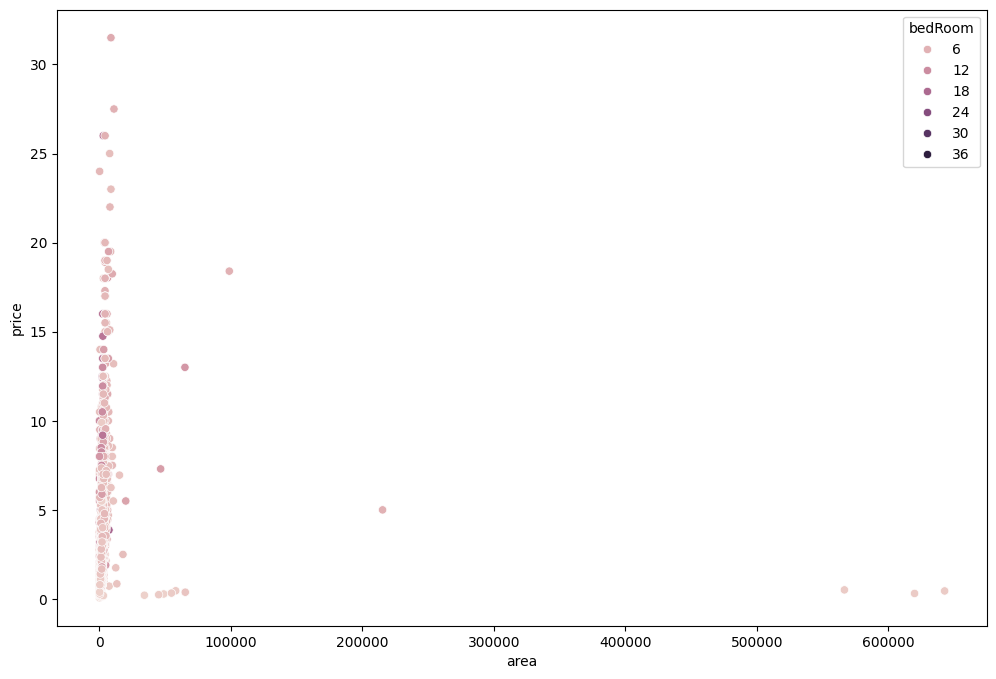

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df['area'],y=df['price'],hue=df['bedRoom'])

In [ ]:
df_filtered = df[df['area'] < 10000]

<Axes: xlabel='area', ylabel='price'>

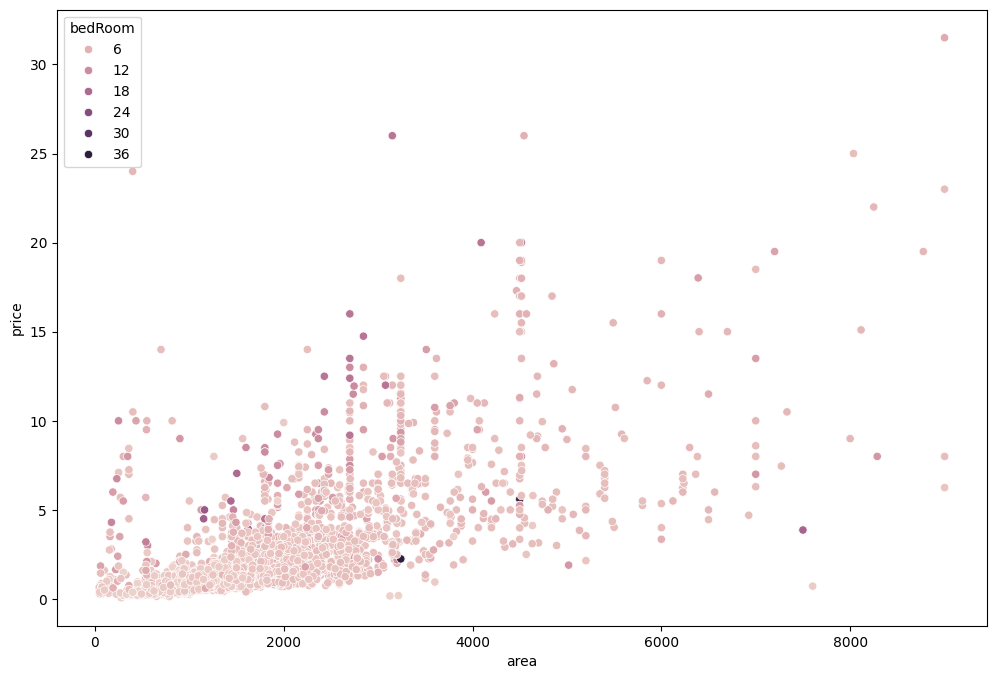

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df_filtered['area'],y=df_filtered['price'],hue=df['bedRoom'])

In [ ]:
fig = px.scatter(df_filtered,x=df_filtered['area'],y=df_filtered['price'], color='bedRoom', title='Scatter Plot')

fig.show()

In [ ]:
fig = px.scatter(df_filtered,x=df_filtered['area'],y=df_filtered['price'], color='agePossession', title='Scatter Plot')

fig.show()

In [ ]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_builtup_area', 'builtup_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

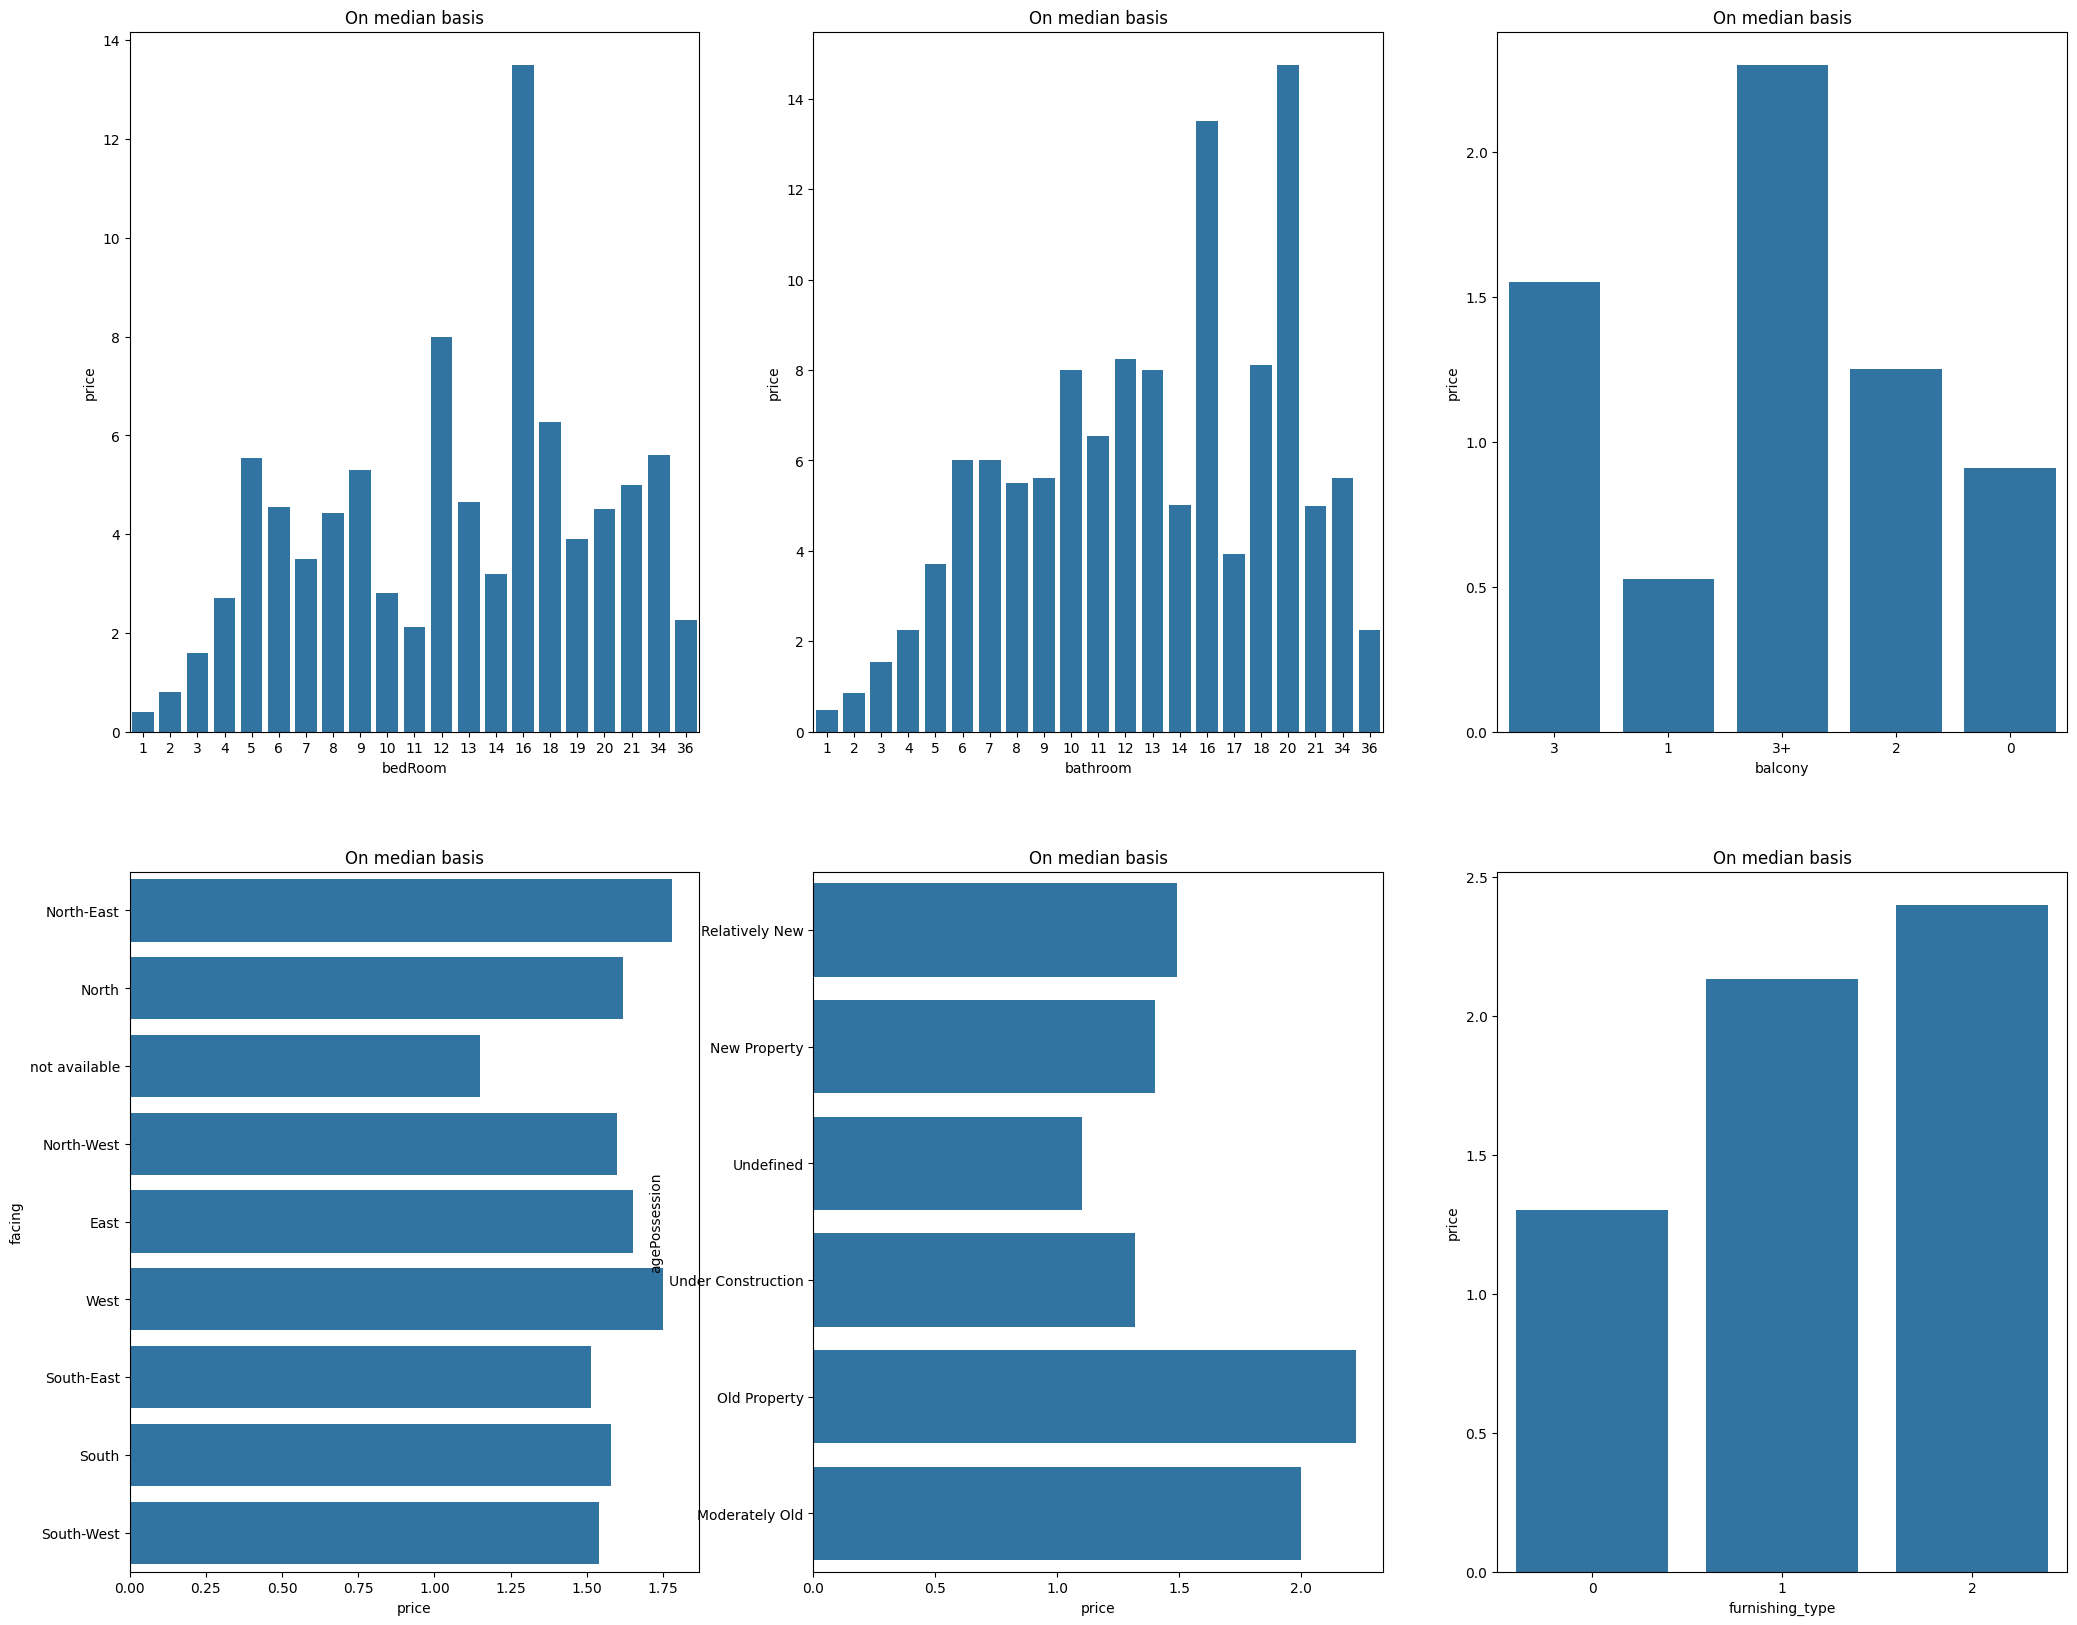

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(25, 20))

sns.barplot(x=df['bedRoom'],y=df['price'],estimator=np.median,errorbar=None, ax=axes[0][0])
axes[0][0].set_title('On median basis')

# Plot the second barplot on the second subplot
sns.barplot(x=df['bathroom'],y=df['price'],estimator=np.median,errorbar=None, ax=axes[0][1])
axes[0][1].set_title('On median basis')

sns.barplot(x=df['balcony'],y=df['price'],estimator=np.median,errorbar=None, ax=axes[0][2])
axes[0][2].set_title('On median basis')

#sns.barplot(x=df['floorNum'],y=df['price'],estimator=np.median, ax=axes[1][0])
#axes[1][0].set_title('On mean basis')

sns.barplot(y=df['facing'],x=df['price'],estimator=np.median,orient='h',errorbar=None, ax=axes[1][0])
axes[1][0].set_title('On median basis')

sns.barplot(y=df['agePossession'],x=df['price'],estimator=np.median,orient='h',errorbar=None, ax=axes[1][1])
axes[1][1].set_title('On median basis')

sns.barplot(x=df['furnishing_type'],y=df['price'],estimator=np.median,errorbar=None, ax=axes[1][2])
axes[1][2].set_title('On median basis')







plt.show()

<Axes: xlabel='luxury_score', ylabel='price'>

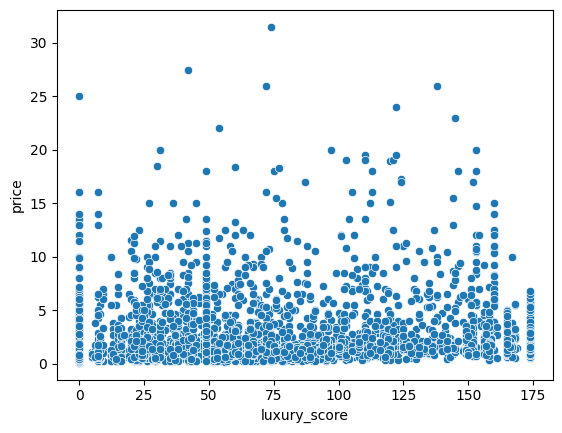

In [ ]:
sns.scatterplot(x=df['luxury_score'],y=df['price'])

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)

ValueError: could not convert string to float: 'flat'

<Figure size 800x800 with 0 Axes>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3808 entries, 0 to 3816
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   property_type       3808 non-null   object 
 1   society             3807 non-null   object 
 2   sector              3808 non-null   object 
 3   price               3808 non-null   float64
 4   price_per_sqft      3808 non-null   float64
 5   area                3808 non-null   float64
 6   areaWithType        3808 non-null   object 
 7   bedRoom             3808 non-null   int64  
 8   bathroom            3808 non-null   int64  
 9   balcony             3808 non-null   object 
 10  floorNum            3787 non-null   float64
 11  facing              3808 non-null   object 
 12  agePossession       3808 non-null   object 
 13  super_builtup_area  1893 non-null   float64
 14  builtup_area        1792 non-null   float64
 15  carpet_area         1917 non-null   float64
 16  study room 

In [ ]:
df.iloc[:,[3,4,5,7,8,10,13,14,15,16,17,18,19,20,21,22]].corr(method='spearman')['price'].sort_values(ascending=False)

price                 1.00
super_builtup_area    0.78
carpet_area           0.75
area                  0.75
builtup_area          0.74
price_per_sqft        0.74
bathroom              0.72
bedRoom               0.67
servant room          0.51
furnishing_type       0.31
pooja room            0.27
store room            0.24
luxury_score          0.23
study room            0.20
floorNum              0.02
others               -0.00
Name: price, dtype: float64

In [81]:
df['sector'].unique()

array(['sector 90', 'sector 69', 'sector 108', 'sector 92', 'sector 111',
       'sector 17', 'sector 61', 'sector 24', 'sector 43', 'sector 70',
       'sector 71', 'sector 48', 'sector 88', 'sector 67', 'sector 22',
       'sector 37', 'sector 104', 'sector 10', 'sector 65', 'sector 4',
       'sector 82', 'sector 81', 'sector 50', 'sector 107', 'sector 89',
       'sector 54', 'sector 66', 'sector 99', 'sector 85', 'sector 36',
       'sector 79', 'sector 51', 'sector 102', 'sohna road', 'sector 7',
       'sector 78', 'sector 28', 'sector 95', 'sector 59', 'sector 72',
       'sector 103', 'sector 23', 'sector 106', 'sector 49', 'sector 2',
       'sector 56', 'sector 38', 'sector 52', 'sector 109', 'sector 3',
       'sector 46', 'sector 26', 'sector 14', 'sector 15', 'sector 68',
       'sector 86', 'sector 27', 'sector 62', 'sector 110', 'sector 5',
       'sector 77', 'sector 80', 'sector 91', 'bissar', 'sector 74',
       'sector 40', 'sector 33', 'sector 83', 'sector 12', 'fa

In [80]:
df.shape

(3808, 23)

In [82]:
from pathlib import Path

In [83]:
filepath = Path('/content/drive/MyDrive/Capstone_Project_REAL_ESTATE/gurgaon_real_estate_cleaned_ver3.csv')

In [84]:
df.to_csv(filepath,index=False)